**Small Image Classification Using Convolutional Neural Network (CNN)**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [8]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

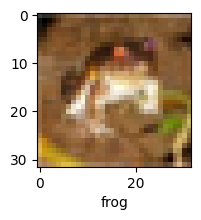

In [9]:
plot_sample(X_train,y_train, 0)

In [10]:
#Normalizing the training data
X_train = X_train / 255
X_test = X_test / 255

**CNN model**

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4563 - accuracy: 0.4744
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1003 - accuracy: 0.6159
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9746 - accuracy: 0.6604
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8955 - accuracy: 0.6891
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8244 - accuracy: 0.7132
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7679 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7201 - accuracy: 0.7494
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6710 - accuracy: 0.7660
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6303 - accuracy: 0.7806
Epoch 10/10
1563/1563 [==============================] - 59s 37m

In [13]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9554 - accuracy: 0.6974


[0.9554322957992554, 0.6973999738693237]

In [14]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[3.52211413e-04, 7.35097910e-06, 7.35477135e-02, 5.06780028e-01,
        2.50802864e-03, 2.63414085e-01, 1.53227255e-01, 4.43889367e-05,
        1.16971911e-04, 2.03397121e-06],
       [7.48307270e-04, 4.63865290e-04, 4.31457146e-08, 1.03189510e-08,
        5.25713117e-09, 6.07498585e-09, 6.31267394e-09, 3.94701286e-12,
        9.98759389e-01, 2.82968558e-05],
       [8.63002479e-01, 2.84147188e-02, 1.41478935e-03, 1.25666503e-02,
        5.88866277e-03, 2.24462617e-03, 6.98790012e-04, 5.80593850e-03,
        2.29893997e-02, 5.69739752e-02],
       [9.71279204e-01, 1.61023461e-03, 2.95943988e-04, 7.99026689e-04,
        1.49512625e-05, 7.15565911e-05, 2.49805780e-05, 7.58364740e-06,
        2.48504020e-02, 1.04623206e-03],
       [3.25873543e-07, 5.37393021e-07, 1.49126174e-02, 2.01279931e-02,
        9.18262362e-01, 1.02593843e-03, 4.56568077e-02, 5.74621527e-06,
        7.80243772e-06, 1.85728055e-08]], dtype=float32)

TypeError: only integer scalar arrays can be converted to a scalar index

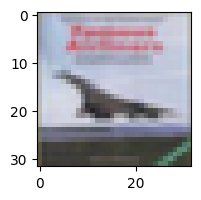

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
y_test[:5]
plot_sample(X_test,y_test,3)

In [18]:
classes[y_classes[3]]

'airplane'